In [5]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [61]:
freqs = np.load('freqs.npy')

In [63]:
np.mean(freqs)

100.42059481156046

In [65]:
signal = np.load('signal.npy')
N = 5000 # number of samples
f0 = 100.42 # Hz
dt = 1/f0 # s
t = np.arange(0, N*dt, dt) # time

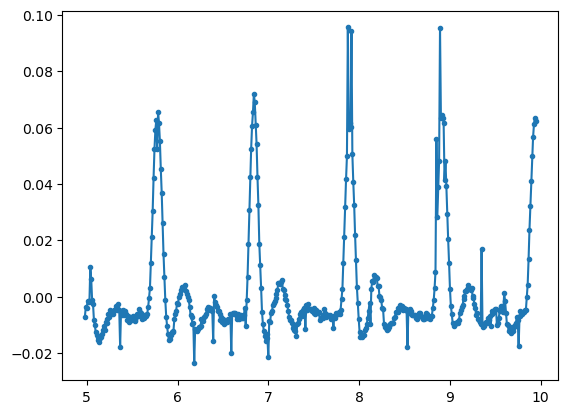

In [71]:
plt.plot(t[500:1000], signal[500:1000], '.-')

In [68]:
signal_fft = np.fft.fft(signal)
fs = np.linspace(0, 1/dt, N)

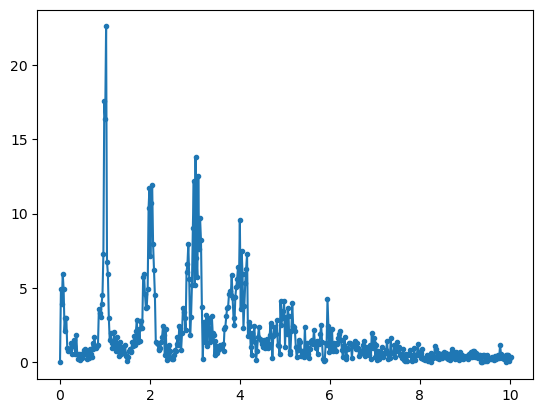

In [69]:
plt.plot(fs[:N//10], np.abs(signal_fft)[:N//10], '.-')

In [31]:
x = np.linspace(0, 4, N)
y = np.sin(2*np.pi*x/4)

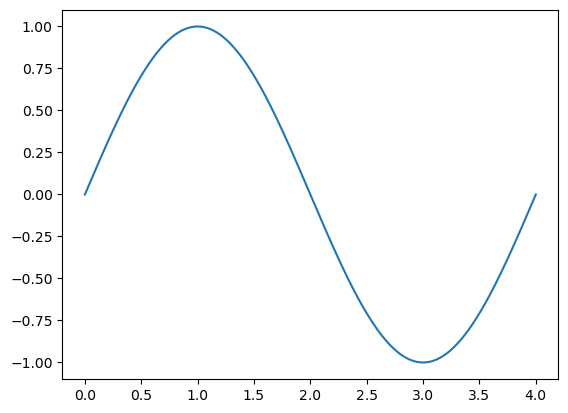

In [32]:
plt.plot(x, y)

In [33]:
y_fft = np.fft.fft(y)

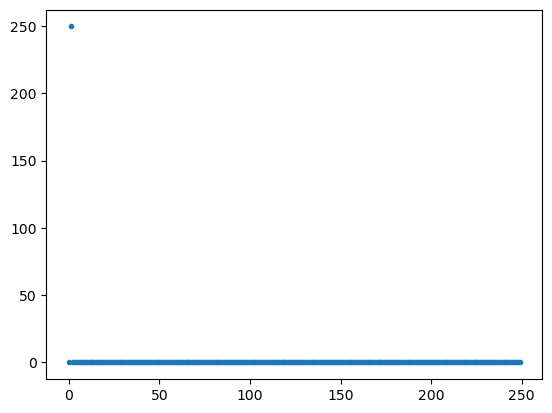

In [34]:
plt.plot(np.abs(y_fft)[:N//2], '.')